In [1]:
import pandas as pd
ABCD=pd.read_csv('/scratch/connectome/3DCNN/data/1.ABCD/4.demo_qc/ABCD_phenotype_total.csv')
UKB=pd.read_csv('/scratch/connectome/3DCNN/data/2.UKB/2.demo_qc/UKB_phenotype.csv')

In [9]:
import os
import glob
os.getcwd()
key='24'
glob.glob(f'/scratch/connectome/jubin/result/model/*_{key}_*.pth')[0]

'/scratch/connectome/jubin/result/model/densenet3D121_TL_age_UKB_ABCD_24_07b86a.pth'

In [23]:
a = ""
a == None

False

In [17]:
import argparse 
parser = argparse.ArgumentParser()
parser.add_argument("--GPU_NUM",default=1,type=int,required=True,help='')
parser.add_argument("--b",default=1,type=int,required=True,help='')

_StoreAction(option_strings=['--b'], dest='b', nargs=None, const=None, default=1, type=<class 'int'>, choices=None, help='', metavar=None)

In [18]:
args = parser.parse_args(args=['--GPU_NUM', '2','--b', '1'])

In [20]:
args

Namespace(GPU_NUM=2, b=1)

In [ ]:
!watch -n 1 nvidia-smi

| 30%   29C    P8    23W / 200W |   4494MiB / 24268MiB |0%Default |

In [17]:
ABCD.age.describe()

count    11536.000000
mean       118.953190
std          7.464702
min        108.000000
25%        112.000000
50%        119.000000
75%        125.000000
max        131.000000
Name: age, dtype: float64

In [18]:
UKB.age.describe()

count    502485.000000
mean         56.528657
std           8.095190
min          37.000000
25%          50.000000
50%          58.000000
75%          63.000000
max          73.000000
Name: age, dtype: float64

In [4]:
!pwd

/scratch/connectome/jubin/ABCD-3DCNN-jub/transfer_learning


In [3]:
!python3 run_3DCNN_transfer_learning.py --transfer sex --cat_target sex  --dataset ABCD --data freesurfer --val_size 0.25 --test_size 0.5 --optim Adam --lr 1e-4 --resize 80 80 80 --scheduler on --train_batch_size 128 --val_batch_size 128 --exp_name tltest1 --epoch 2 --model densenet3D121 --sbatch True

*** Categorical target labels are ['sex'] and Numerical target labels are None *** 

100%|██████████████████████████████████| 11352/11352 [00:00<00:00, 34391.68it/s]
In train dataset, sex contains 1383 CASE and 1455 CONTROL
In validation dataset, sex contains 1327 CASE and 1511 CONTROL
In test dataset, sex contains 2700 CASE and 2976 CONTROL
*** Making a dataset is completed *** 

The best checkpoint is loaded
<class 'torch.nn.modules.linear.Linear'>
*** Model setting for transfer learning is done *** 

^C


The list of models are as follows 
- **simple 3DCNN**
- **VGGNet** (11 layers, 13 layers, 16 layers, 19 layers)
- **RessNet** (50 layers, 101 layers, 152 layers)
- **DenseNet** (121 layers, 169 layers, 201 layers, 264 layers)

### Example command for single task transfer learning 
   
Include **--transfer age** or **--transfer sex** to command   
This option will load pretrained age prediction model or sex model prediction    
If you want to use ABCD dataset, you should set **--dataset ABCD** and **--data freesurfer or fmriprep**.  


<code> <b> python3 /scratch/connectome/jubin/ABCD-3DCNN-jub/transfer_learning/run_3DCNN_transfer_learning.py \
    --transfer age --num_target age --dataset ABCD --data freesurfer --val_size 0.25 --test_size 0.5 \
    --lr 1e-3 --optim Adam --resize 96 96 96 --scheduler on --train_batch_size 128 --val_batch_size 128 \
    --exp_name TL_age_UKB_ABCD_01 --model densenet3D121 --epoch 60 --sbatch True </code>




    
This python script could be used in both **single task learning** and **multi task learning**  

### The example of single task learning

```
python3 run_3DCNN_hard_parameter_sharing.py --cat_target sex  --optim SGD --lr 1e-3 --gpus 4 5 --exp_name sex_test --model {model_name} --epoch 300 --train_batch_size 32 --val_batch_size 32 
```
or
```
python3 run_3DCNN_hard_parameter_sharing.py --num_target age  --optim SGD --lr 1e-3 --gpus 4 5 --exp_name sex_test --model {model_name} --epoch 300 --train_batch_size 32 --val_batch_size 32 
```
  
### The example of multi task learning

```
python3 run_3DCNN_hard_parameter_sharing.py --cat_target sex income --optim SGD --lr 1e-3 --gpus 4 5 --exp_name sex_test --model {model_name} --epoch 300 --train_batch_size 32 --val_batch_size 32 
```  
or 

```
python3 run_3DCNN_hard_parameter_sharing.py --cat_target sex --num_target age --optim SGD --lr 1e-3 --gpus 4 5 --exp_name sex_test --model {model_name} --epoch 300 --train_batch_size 32 --val_batch_size 32 
``` 

### The example of using slurm 
If you want to using slurm SBATCH, add options ```--sbatch True```.  
In this case, you don't need to assign gpu device ids by using gpu option ```--gpus {device_id}```.



In [8]:
!pwd

/scratch/connectome/jubin/ABCD-3DCNN/STEP_5_Transfer_learning


In [ ]:
    # Run Experiment
    setting, result = experiment(partition, subject_data, save_dir, deepcopy(args))

    # Save result
    save_exp_result(save_dir, setting, result)
    print("*** Experiment Done ***\n")

In [1]:
!pip install torchsummary

In [14]:
os.chdir('/scratch/connectome/jubin/ABCD-3DCNN-jub/transfer_learning')
os.listdir()

['README.md',
 'envs',
 'models',
 'result',
 'run_3DCNN_transfer_learning.py',
 'dataloaders',
 'test.ipynb',
 'utils',
 '.ipynb_checkpoints']

In [1]:
## ======= load module ======= ##
from utils.utils import argument_setting, select_model, CLIreporter, save_exp_result, checkpoint_save, checkpoint_load  #  
#from utils.optimizer import CosineAnnealingWarmUpRestarts
from dataloaders.dataloaders import make_dataset
from dataloaders.preprocessing import preprocessing_cat, preprocessing_num
from envs.experiments import train, validate, test
from envs.transfer import setting_transfer
import hashlib
import datetime

import os
from os import listdir
from os.path import isfile, join
import glob
from tqdm.auto import tqdm ##progress
import time
import math
import random
from copy import deepcopy

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, utils
import torch.optim as optim
from torchsummary import summary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

/home/connectome/jubin/.conda/envs/3DCNN/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from genericpath import isdir
import os
import pandas as pd
import hashlib
import json
import argparse 
import torch
from copy import deepcopy

import models.simple3d as simple3d #model script
import models.vgg3d as vgg3d #model script
import models.resnet3d as resnet3d #model script
import models.densenet3d as densenet3d #model script

parser = argparse.ArgumentParser()

#parser.add_argument("--GPU_NUM",default=1,type=int,required=True,help='')
parser.add_argument("--model",required=True,type=str,help='',choices=['simple3D','vgg3D11','vgg3D13','vgg3D16','vgg3D19','resnet3D50','resnet3D101','resnet3D152', 'densenet3D121', 'densenet3D169','densenet201','densenet264'])
parser.add_argument("--dataset",required=True, type=str, choices=['UKB','ABCD'],help='') # revising
parser.add_argument("--data", type=str, help='select data type') # revising
parser.add_argument("--val_size",default=0.1,type=float,required=False,help='')
parser.add_argument("--test_size",default=0.1,type=float,required=False,help='')
parser.add_argument("--resize",default=[96, 96, 96],type=int,nargs="*",required=False,help='')
parser.add_argument("--train_batch_size",default=16,type=int,required=False,help='')
parser.add_argument("--val_batch_size",default=16,type=int,required=False,help='')
parser.add_argument("--test_batch_size",default=1,type=int,required=False,help='')
parser.add_argument("--in_channels",default=1,type=int,required=False,help='')
parser.add_argument("--optim",type=str,required=True,help='', choices=['Adam','SGD','RAdam'])
parser.add_argument("--scheduler",type=str,default='',help='') # revising
parser.add_argument("--lr", default=0.01,type=float,required=False,help='')
parser.add_argument("--weight_decay",default=0.001,type=float,required=False,help='')
parser.add_argument("--epoch",type=int,required=True,help='')
parser.add_argument("--epoch_FC",type=int,required=False,default=None,help='')
parser.add_argument("--exp_name",type=str,required=True,help='')
parser.add_argument("--cat_target", type=str, nargs='*', required=False, help='')
parser.add_argument("--num_target", type=str,nargs='*', required=False, help='')
parser.add_argument("--confusion_matrix", type=str, nargs='*',required=False, help='')
parser.add_argument("--gpus", type=int,nargs='*', required=False, help='')
parser.add_argument("--sbatch", type=str, required=False, choices=['True', 'False'])
parser.add_argument("--transfer", type=str, required=False, default=None, choices=['sex','age','simclr'])
parser.add_argument("--unfrozen_layer", type=int, required=False, default=0)
parser.add_argument("--load", type=str, required=False, default="")    

_StoreAction(option_strings=['--load'], dest='load', nargs=None, const=None, default='', type=<class 'str'>, choices=None, help=None, metavar=None)

In [ ]:
command = '--transfer age --num_target age --dataset ABCD --data freesurfer --val_size 0.25 --test_size 0.5 --lr 1e-5 --optim Adam --resize 96 96 96 --scheduler on --train_batch_size 128 --val_batch_size 128 --exp_name loadtset --model densenet3D121 --epoch 3 --unfrozen_layer 6 --gpus 0 --load 01_212abe'

In [82]:
command = command.split(" ")
print(command)
args = parser.parse_args(args=command)
print("Categorical target labels are {} and Numerical target labels are {}".format(args.cat_target, args.num_target))

if not args.cat_target:
    args.cat_target = []
elif not args.num_target:
    args.num_target = []
elif not args.cat_target and args.num_target:
    raise ValueError('YOU SHOULD SELECT THE TARGET!')

['--transfer', 'age', '--num_target', 'age', '--dataset', 'ABCD', '--data', 'freesurfer', '--val_size', '0.25', '--test_size', '0.5', '--lr', '1e-5', '--optim', 'Adam', '--resize', '96', '96', '96', '--scheduler', 'on', '--train_batch_size', '128', '--val_batch_size', '128', '--exp_name', 'loadtset', '--model', 'densenet3D121', '--epoch', '3', '--unfrozen_layer', '6', '--gpus', '0', '--load', '01_212abe']
Categorical target labels are None and Numerical target labels are ['age']


In [44]:
import sys
del sys.modules['envs.transfer']

In [83]:
## ========= Helper Functions =============== ##

def set_optimizer(args, net):
    if args.optim == 'SGD':
        optimizer = optim.SGD(
            params = filter(lambda p: p.requires_grad, net.parameters()),
            lr = args.lr,
            momentum = 0.9)
    elif args.optim == 'Adam':
        optimizer = optim.Adam(
            params = filter(lambda p: p.requires_grad, net.parameters()),
            lr = args.lr,
            weight_decay = args.weight_decay)
    elif args.optim =='RAdam':
        optimizer = optim.RAdam(
            params = filter(lambda p: p.requires_grad, net.parameters()),
            lr = args.lr,
            weight_decay = args.weight_decay,
            betas=(0.9, 0.999), eps=1e-08, )
    else:
        raise ValueError('In-valid optimizer choice')
        
    return optimizer
    
def set_lr_scheduler(args, optimizer):
    if args.scheduler != None:
        if args.scheduler == 'on':
            scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,'max', patience=10, factor=0.1, min_lr=1e-9)
        elif args.scheduler == 'cos':
#             scheduler = CosineAnnealingWarmUpRestarts(optimizer, T_0=5, T_mult=2, eta_max=0.1, T_up=2, gamma=1)
            scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=15, T_mult=1, eta_min=0)
    else:
        scheduler = None
        
    return scheduler
    
##

cwd = os.getcwd()

## ========= Setting ========= ##
# args = argument_setting()

epoch_FC = 20

if args.transfer:
    args.resize = (96, 96, 96) if args.transfer == 'age' else (80, 80, 80)

save_dir = os.getcwd() + '/result' #  
partition, subject_data = make_dataset(args) #  

## ========= Run Experiment and saving result ========= ##
# seed number
seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)

time_hash = datetime.datetime.now().time()
hash_key = hashlib.sha1(str(time_hash).encode()).hexdigest()[:6]
args.exp_name = args.exp_name + f'_{hash_key}'


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 11357/11357 [00:00<00:00, 108306.98it/s]

*** Making a dataset is completed *** 



In [116]:
args.unfrozen_layer=16

In [117]:
net = select_model(subject_data, args) #  


# loading pretrained model if transfer option is given
if (args.transfer != None) and (args.load == ""):
    print("*** Model setting for transfer learning *** \n")
    net = checkpoint_load(net, args.transfer)
elif args.load:
    model_dir = glob.glob(f'/scratch/connectome/jubin/result/model/*_{args.load}*.pth')[0]
    net = checkpoint_load(net, model_dir)


# setting a DataParallel and model on GPU
if args.sbatch == "True":
    devices = []
    for d in range(torch.cuda.device_count()):
        devices.append(d)
    net = nn.DataParallel(net, device_ids = devices)
else:
    if not args.gpus:
        raise ValueError("GPU DEVICE IDS SHOULD BE ASSIGNED")
    else:
        net = nn.DataParallel(net, device_ids=args.gpus)

net.to(f'cuda:{net.device_ids[0]}')


# setting for results' DataFrame
train_losses = {}
train_accs = {}
val_losses = {}
val_accs = {}
test_accs = {}

targets = args.cat_target + args.num_target
for target_name in targets:
    train_losses[target_name] = []
    train_accs[target_name] = []
    val_losses[target_name] = []
    val_accs[target_name] = []
    test_accs[target_name] = []

result = {}
result['train_losses'] = train_losses
result['train_accs'] = train_accs
result['val_losses'] = val_losses
result['val_accs'] = val_accs
result['test_accs'] = test_accs


# training a model
print("*** Start training a model *** \n")

if (args.unfrozen_layer > 0) and (args.load == ""):
    print("*** Transfer Learning - Training FC layers *** \n")

    setting_transfer(net.module, num_unfreezed = 0)
    optimizer = set_optimizer(args, net)
    scheduler = set_lr_scheduler(args, optimizer)

    global epoch_FC
    if args.epoch_FC != None:
        epoch_FC = args.epoch_FC

    for epoch in tqdm(range(epoch_FC)):
        ts = time.time()
        net, train_loss, train_acc = train(net,partition,optimizer,args)
        val_loss, val_acc = validate(net,partition,scheduler,args)
        te = time.time()

        if args.transfer == 'simclr':
            test_acc, confusion_matrices = test(net, partition, args)
            print(f"Test result for epoch {epoch}: ",test_acc)

        ## sorting the results
        for target_name in targets:
            train_losses[target_name].append(train_loss[target_name])
            train_accs[target_name].append(train_acc[target_name])
            val_losses[target_name].append(val_loss[target_name])
            val_accs[target_name].append(val_acc[target_name])
            if args.transfer == 'simclr':
                test_accs[target_name].append(test_acc[target_name])


        ## visualize the result
        CLIreporter(targets, train_loss, train_acc, val_loss, val_acc)
        print('Epoch {}. Current learning rate {}. Took {:2.2f} sec'.format(epoch+1,optimizer.param_groups[0]['lr'],te-ts))

        ## saving the checkpoint
        checkpoint_dir = checkpoint_save(net, save_dir, epoch, val_acc, val_accs, args)


        if epoch%10 == 0:
            save_exp_result(save_dir, vars(args).copy(), result)

    print("Adjust learning rate for Training unfrozen layers")
    print(f"From {args.lr} to {args.lr/100}")    
    args.lr /= 100
    result['lr_adjusted'] = args.lr


print("*** Training unfrozen layers *** \n")

setting_transfer(net.module, num_unfreezed = args.unfrozen_layer)
optimizer = set_optimizer(args, net)
scheduler = set_lr_scheduler(args, optimizer)


The best checkpoint is loaded
*** Start training a model *** 

*** Training unfrozen layers *** 



In [110]:
net.to('cpu')
torch.cuda.empty_cache()

net = checkpoint_load(net, model_dir)
if args.sbatch == 'True':
    net.cuda()
else:
    net.to(f'cuda:{args.gpus[0]}')
test_acc, confusion_matrices = test(net, partition, args)
print("Test result: ",test_acc)



The best checkpoint is loaded


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5679/5679 [11:01<00:00,  8.58it/s]

Test result:  {'age': [0.010914041399332164]}


In [111]:
args.lr

1e-05

In [135]:
def is_layer(module_name):
    if ((module_name.count(".") == 1 and "layer" in module_name) or
        (('.' not in module_name) and (True in map(lambda x: x in module_name, ['conv','norm','transition'])))
       ):
        return True
    else:
        return False
    
for n,p in net.module.features.named_modules():
    if is_layer(n):
        print(n)

conv0
norm0
denseblock1.denselayer1
denseblock1.denselayer2
denseblock1.denselayer3
denseblock1.denselayer4
denseblock1.denselayer5
denseblock1.denselayer6
transition1
denseblock2.denselayer1
denseblock2.denselayer2
denseblock2.denselayer3
denseblock2.denselayer4
denseblock2.denselayer5
denseblock2.denselayer6
denseblock2.denselayer7
denseblock2.denselayer8
denseblock2.denselayer9
denseblock2.denselayer10
denseblock2.denselayer11
denseblock2.denselayer12
transition2
denseblock3.denselayer1
denseblock3.denselayer2
denseblock3.denselayer3
denseblock3.denselayer4
denseblock3.denselayer5
denseblock3.denselayer6
denseblock3.denselayer7
denseblock3.denselayer8
denseblock3.denselayer9
denseblock3.denselayer10
denseblock3.denselayer11
denseblock3.denselayer12
denseblock3.denselayer13
denseblock3.denselayer14
denseblock3.denselayer15
denseblock3.denselayer16
denseblock3.denselayer17
denseblock3.denselayer18
denseblock3.denselayer19
denseblock3.denselayer20
denseblock3.denselayer21
denseblock3.d

In [149]:
for n,p in net.module.named_children():
    print(n)

features
FClayers


In [133]:
net.module.features

Sequential(
  (conv0): Conv3d(1, 64, kernel_size=(7, 7, 7), stride=(1, 2, 2), padding=(3, 3, 3), bias=False)
  (norm0): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU(inplace=True)
  (pool0): MaxPool3d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv3d(64, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
      (norm2): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv2): Conv3d(128, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm3d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (co

In [ ]:

for epoch in tqdm(range(args.epoch)):
    ts = time.time()
    net, train_loss, train_acc = train(net,partition,optimizer,args)
    val_loss, val_acc = validate(net,partition,scheduler,args)
    te = time.time()

    if args.transfer == 'simclr':
        test_acc, confusion_matrices = test(net, partition, args)
        print(f"Test result for epoch {epoch}: ",test_acc)

    ## sorting the results
    for target_name in targets:
        train_losses[target_name].append(train_loss[target_name])
        train_accs[target_name].append(train_acc[target_name])
        val_losses[target_name].append(val_loss[target_name])
        val_accs[target_name].append(val_acc[target_name])
        if args.transfer == 'simclr' and (epoch+1) < args.epoch:
            test_accs[target_name].append(test_acc[target_name])            

    ## visualize the result
    CLIreporter(targets, train_loss, train_acc, val_loss, val_acc)
    print('Epoch {}. Current learning rate {}. Took {:2.2f} sec'.format(epoch+1,optimizer.param_groups[0]['lr'],te-ts))

    ## saving the checkpoint
    checkpoint_dir = checkpoint_save(net, save_dir, epoch, val_acc, val_accs, args)

    if epoch%10 == 0:
        save_exp_result(save_dir, vars(args).copy(), result)


# testing a model
print("\n*** Start testing a model *** \n")
net.to('cpu')
torch.cuda.empty_cache()

net = checkpoint_load(net, checkpoint_dir)
if args.sbatch == 'True':
    net.cuda()
else:
    net.to(f'cuda:{args.gpus[0]}')
test_acc, confusion_matrices = test(net, partition, args)
print("Test result: ",test_acc)

# summarizing results

result['test_acc'] = test_acc
result['train_acc'] = train_acc
result['val_acc'] = val_acc

if confusion_matrices != None:
    result['confusion_matrices'] = confusion_matrices

In [74]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

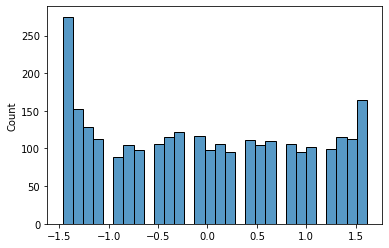

In [75]:
labels=[]
for item in partition['train'].labels:
    labels.append(item['age'])
ls = pd.Series(labels)
sns.histplot(ls,bins=30)

<AxesSubplot:ylabel='Count'>

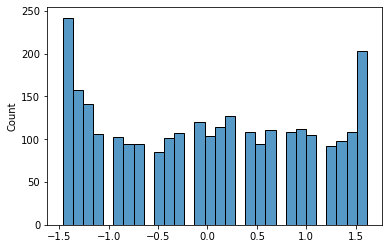

In [76]:
labels=[]
for item in partition['val'].labels:
    labels.append(item['age'])
ls = pd.Series(labels)
sns.histplot(ls,bins=30)

<AxesSubplot:ylabel='Count'>

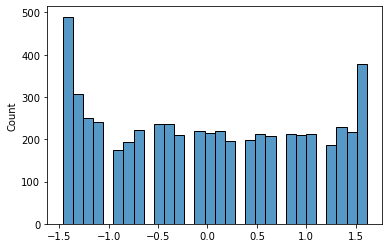

In [77]:
labels=[]
for item in partition['test'].labels:
    labels.append(item['age'])
ls = pd.Series(labels)
sns.histplot(ls,bins=30)

In [80]:
ls

0       0.810089
1       0.944058
2      -1.333425
3      -0.797547
4      -1.333425
          ...   
5674    1.345967
5675   -1.467395
5676   -0.261668
5677   -0.529607
5678   -0.931516
Length: 5679, dtype: float64

In [46]:
# selecting a model
net = select_model(subject_data, args) #  


# loading pretrained model if transfer option is given
if args.transfer:
    print("*** Model setting for transfer learning *** \n")
    net = checkpoint_load(net, args.transfer)


# setting a DataParallel and model on GPU
if args.sbatch == "True":
    devices = []
    for d in range(torch.cuda.device_count()):
        devices.append(d)
    net = nn.DataParallel(net, device_ids = devices)
else:
    if not args.gpus:
        raise ValueError("GPU DEVICE IDS SHOULD BE ASSIGNED")
    else:
        net = nn.DataParallel(net, device_ids=args.gpus)

net.to(f'cuda:{net.device_ids[0]}')


# setting for results' DataFrame
train_losses = {}
train_accs = {}
val_losses = {}
val_accs = {}
test_accs = {}

targets = args.cat_target + args.num_target
for target_name in targets:
    train_losses[target_name] = []
    train_accs[target_name] = []
    val_losses[target_name] = []
    val_accs[target_name] = []
    test_accs[target_name] = []

result = {}
result['train_losses'] = train_losses
result['train_accs'] = train_accs
result['val_losses'] = val_losses
result['val_accs'] = val_accs
result['test_accs'] = test_accs


# training a model
print("*** Start training a model *** \n")


print("*** Training unfrozen layers *** \n")

setting_transfer(net.module, num_unfreezed = args.unfrozen_layer)
optimizer = set_optimizer(args, net)
scheduler = set_lr_scheduler(args, optimizer)

*** Model setting for transfer learning *** 

The best checkpoint is loaded
*** Start training a model *** 

*** Training unfrozen layers *** 



In [47]:
net

DataParallel(
  (module): DenseNet(
    (features): Sequential(
      (conv0): Conv3d(1, 64, kernel_size=(7, 7, 7), stride=(1, 2, 2), padding=(3, 3, 3), bias=False)
      (norm0): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool3d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv3d(64, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
          (norm2): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv3d(128, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm3d

In [48]:
for epoch in tqdm(range(args.epoch)):
    ts = time.time()
    net, train_loss, train_acc = train(net,partition,optimizer,args)
    val_loss, val_acc = validate(net,partition,scheduler,args)
    te = time.time()

    if args.transfer == 'simclr':
        test_acc, confusion_matrices = test(net, partition, args)
        print(f"Test result for epoch {epoch}: ",test_acc)

    ## sorting the results
    for target_name in targets:
        train_losses[target_name].append(train_loss[target_name])
        train_accs[target_name].append(train_acc[target_name])
        val_losses[target_name].append(val_loss[target_name])
        val_accs[target_name].append(val_acc[target_name])
        if args.transfer == 'simclr' and (epoch+1) < args.epoch:
            test_accs[target_name].append(test_acc[target_name])            

    ## visualize the result
    CLIreporter(targets, train_loss, train_acc, val_loss, val_acc)
    print('Epoch {}. Current learning rate {}. Took {:2.2f} sec'.format(epoch+1,optimizer.param_groups[0]['lr'],te-ts))

    ## saving the checkpoint
    checkpoint_dir = checkpoint_save(net, save_dir, epoch, val_acc, val_accs, args)

    if epoch%10 == 0:
        save_exp_result(save_dir, vars(args).copy(), result)


# testing a model
print("\n*** Start testing a model *** \n")
net.to('cpu')
torch.cuda.empty_cache()

net = checkpoint_load(net, checkpoint_dir)
if args.sbatch == 'True':
    net.cuda()
else:
    net.to(f'cuda:{args.gpus[0]}')
test_acc, confusion_matrices = test(net, partition, args)
print("Test result: ",test_acc)

# summarizing results

result['test_acc'] = test_acc
result['train_acc'] = train_acc
result['val_acc'] = val_acc

if confusion_matrices != None:
    result['confusion_matrices'] = confusion_matrices

  0%|                                                                                                                        | 0/3 [00:47<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Run Experiment
setting, result = experiment(partition, subject_data, save_dir, deepcopy(args))

# Save result
save_exp_result(save_dir, setting, result)
print("*** Experiment Done ***\n")

In [11]:
save_dir = os.getcwd() + '/result' # revising
partition, subject_data = make_dataset(args) # revising

## ========= Run Experiment and saving result ========= ##
# seed number
seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)

time_hash = datetime.datetime.now().time()
hash_key = hashlib.sha1(str(time_hash).encode()).hexdigest()[:6]
args.exp_name = args.exp_name + f'_{hash_key}'

# # Run Experiment
# setting, result = experiment(partition, subject_data, save_dir, deepcopy(args))

# # Save result
# save_exp_result(save_dir, setting, result)
# ## ====================================== #


  0%|          | 0/11357 [00:00<?, ?it/s]

*** Making a dataset is completed *** 



In [16]:
len(partition['train'].labels)

2839

In [98]:
somename1 = 'abcd'
somename2 = 'xyz'
names = ['a','c','d']
lambda x: x in somename
False in map(lambda x: x in somename2, names)

True

In [134]:
import torch

## Main function that freezes layers & re-initialize FC layer
def setting_transfer(net, num_unfreezed):
    if num_unfreezed != 0:
        layers_total = []

        for name, module in net.features.named_modules():
            if is_layer(name):
                layers_total.append((name, module))
                
        num_layers = len(layers_total)

        freeze_until = num_layers - num_unfreezed
        frozen_layers = layers_total[:freeze_until-1]
        unfrozen_layers = layers_total[freeze_until:]
        
        freeze_layers(net, frozen_layers)
        initialize_weights(net, unfrozen_layers)
        
    elif num_unfreezed == 0:
        freeze_layers(net, None)
        initialize_weights(net, None)
        
    else:
        print("ERROR!! Invalid freeze layer number")
        
        
def is_layer(module_name):
    if ((module_name.count(".") == 1 and "layer" in module_name) or
        (('.' not in module_name) and (True in map(lambda x: x in module_name, ['conv','norm','transition'])))
       ):
        return True
    else:
        return False

    
# freeze non-FC layers from last layer to first layer 
def freeze_layers(net, frozen_layers):    
    if frozen_layers == None:
        net.features.apply(freeze)
    else:
        for name, module in frozen_layers:
            module.apply(freeze)

            
# freezing layer's parameters by setting requires_grad as False
def freeze(layer):
    for params in layer.parameters():
        params.requires_grad = False
    

# initialize FC layer 
def initialize_weights(net, unfrozen_layers):
    ## initialize FC layer
    net.FClayers.apply(weight_init_xavier_uniform)
    
    if unfrozen_layers == None:
        return
    
    ## initialize other unfrozen layers
    for name, module in unfrozen_layers:
        for name, module in unfrozen_layers:
            module.apply(weight_init_xavier_uniform)

            
def weight_init_xavier_uniform(layer):
    if isinstance(layer, torch.nn.Conv3d) or isinstance(layer, torch.nn.Linear):
        print(type(layer))
        torch.nn.init.xavier_uniform_(layer.weight)
        if layer.bias != None:
            layer.bias.data.fill_(0.01)
    elif isinstance(layer, torch.nn.BatchNorm3d):
        layer.weight.data.fill_(1.0)
        if layer.bias != None:
            layer.bias.data.zero_()
        
# selecting a mode
net = select_model(subject_data, args) # revising

# loading pretrained model if transfer option is given
if args.transfer:
    net = checkpoint_load(net, args.transfer)
    setting_transfer(net, num_unfreezed = 2)
    print("*** Model setting for transfer learning is done *** \n")

The best checkpoint is loaded
<class 'torch.nn.modules.linear.Linear'>
conv or linear weight DONE
conv or linear bias DONE
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
norm weight DONE
norm bias DONE
<class 'torch.nn.modules.conv.Conv3d'>
conv or linear weight DONE
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
norm weight DONE
norm bias DONE
<class 'torch.nn.modules.conv.Conv3d'>
conv or linear weight DONE
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
norm weight DONE
norm bias DONE
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
norm weight DONE
norm bias DONE
<class 'torch.nn.modules.conv.Conv3d'>
conv or linear weight DONE
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
norm weight DONE
norm bias DONE
<class 'torch.nn.modules.conv.Conv3d'>
conv or linear weight DONE
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
norm weight DONE
norm bias DONE
*** Model setting for transfer learning is done *** 



In [119]:
myconv = torch.nn.Conv3d(992,128,(1,1,1),(1,1,1))

In [ ]:
myconv = torch.nn.Conv3d

In [127]:
mylayer

Conv3d(992, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)

In [106]:
for n, p in net.named_parameters():
    if p.requires_grad:
        print(n)

features.denseblock4.denselayer15.norm1.weight
features.denseblock4.denselayer15.norm1.bias
features.denseblock4.denselayer15.conv1.weight
features.denseblock4.denselayer15.norm2.weight
features.denseblock4.denselayer15.norm2.bias
features.denseblock4.denselayer15.conv2.weight
features.denseblock4.denselayer16.norm1.weight
features.denseblock4.denselayer16.norm1.bias
features.denseblock4.denselayer16.conv1.weight
features.denseblock4.denselayer16.norm2.weight
features.denseblock4.denselayer16.norm2.bias
features.denseblock4.denselayer16.conv2.weight
features.norm5.weight
features.norm5.bias
FClayers.0.0.weight
FClayers.0.0.bias


In [ ]:
mymo

In [72]:
for p in mymodule.parameters():

    print(p.requires_grad)

False
False
False
False
False
False


In [32]:
args.gpus = [0]
# selecting a model
net = select_model(subject_data, args) # revising

# loading pretrained model if transfer option is given
if args.transfer:
    net = checkpoint_load(net, args.transfer)
    setting_transfer(net, num_unfreezed = 2)
    print("*** Model setting for transfer learning is done *** \n")

# setting a DataParallel and model on GPU
if args.sbatch == "True":
    devices = []
    for d in range(torch.cuda.device_count()):
        devices.append(d)
    net = nn.DataParallel(net, device_ids = devices)
else:
    if not args.gpus:
        raise ValueError("GPU DEVICE IDS SHOULD BE ASSIGNED")
    else:
        net = nn.DataParallel(net, device_ids=args.gpus)

net.to(f'cuda:{net.device_ids[0]}')


# setting an optimizer & learning rate scheduler
if args.optim == 'SGD':
    optimizer = optim.SGD(
        params = filter(lambda p: p.requires_grad, net.parameters()),
        lr = args.lr,
        momentum = 0.9)
elif args.optim == 'Adam':
    optimizer = optim.Adam(
        params = filter(lambda p: p.requires_grad, net.parameters()),
        lr = args.lr,
        weight_decay = args.weight_decay)
else:
    raise ValueError('In-valid optimizer choice')

if args.scheduler == 'on': # revising
    #scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,'max', patience=4)
    scheduler = CosineAnnealingWarmUpRestarts(optimizer, T_0=10, T_mult=1, eta_max=0.01, T_up=3, gamma=0.5)
else:
    scheduler = None




The best checkpoint is loaded
<class 'torch.nn.modules.linear.Linear'>
<class 'torch.nn.modules.conv.Conv3d'>
<class 'torch.nn.modules.conv.Conv3d'>
<class 'torch.nn.modules.conv.Conv3d'>
<class 'torch.nn.modules.conv.Conv3d'>
*** Model setting for transfer learning is done *** 



In [22]:
prenet = checkpoint_load(net, args.transfer)

The best checkpoint is loaded


In [29]:
for n, p in prenet.FClayers.named_parameters():
    print (n, p)

0.0.weight Parameter containing:
tensor([[ 0.0089,  0.0625,  0.0498,  ...,  0.0475,  0.0434, -0.0535]],
       device='cuda:0', requires_grad=True)
0.0.bias Parameter containing:
tensor([0.0100], device='cuda:0', requires_grad=True)


In [35]:
prenet.FClayers.

SyntaxError: invalid syntax (3114544593.py, line 1)

In [ ]:
torch.nn.init.xavier_uniform_(layer.weight)

In [31]:
for n, p in net.module.FClayers.named_parameters():
    print (n, p)

0.0.weight Parameter containing:
tensor([[ 0.0089,  0.0625,  0.0498,  ...,  0.0475,  0.0434, -0.0535]],
       device='cuda:0', requires_grad=True)
0.0.bias Parameter containing:
tensor([0.0100], device='cuda:0', requires_grad=True)


In [ ]:
param_unfrozen=[]
for name, params in net.module.named_parameters():
    if params.requires_grad: print(name)

In [46]:
param_FC=[]
for name, params in net.module.named_parameters():
    if params.requires_grad: param_FC.append(params)

In [47]:
param_FC[0][0]

tensor([-0.0624, -0.0190, -0.0161,  ...,  0.0444, -0.0107,  0.0454],
       device='cuda:0', grad_fn=<SelectBackward>)

In [44]:
param_FC[0][0]

tensor([ 0.0072,  0.0171, -0.0638,  ..., -0.0487,  0.0538, -0.0361],
       device='cuda:0', grad_fn=<SelectBackward>)

In [ ]:
print(1)

In [ ]:
num_unfreezed = -1
assert num_unfreezed >= 0 and type(num_unfreezed) == int


In [ ]:
# setting for results' DataFrame
train_losses = {}
train_accs = {}
val_losses = {}
val_accs = {}

targets = args.cat_target + args.num_target
for target_name in targets:
    train_losses[target_name] = []
    train_accs[target_name] = []
    val_losses[target_name] = []
    val_accs[target_name] = []


# training a model
print("*** Start training a model *** \n")
for epoch in tqdm(range(args.epoch)):
    ts = time.time()
    net, train_loss, train_acc = train(net,partition,optimizer,args)
    val_loss, val_acc = validate(net,partition,scheduler,args)
    te = time.time()

    ## sorting the results
    for target_name in targets:
        train_losses[target_name].append(train_loss[target_name])
        train_accs[target_name].append(train_acc[target_name])
        val_losses[target_name].append(val_loss[target_name])
        val_accs[target_name].append(val_acc[target_name])

    ## visualize the result
    CLIreporter(targets, train_loss, train_acc, val_loss, val_acc)
    print('Epoch {}. Current learning rate {}. Took {:2.2f} sec'.format(epoch+1,optimizer.param_groups[0]['lr'],te-ts))

    ## saving the checkpoint
    checkpoint_dir = checkpoint_save(net, save_dir, epoch, val_acc, val_accs, args)


# testing a model
print("\n*** Start testing a model *** \n")
net.to('cpu')
torch.cuda.empty_cache()

net = checkpoint_load(net, checkpoint_dir)
if args.sbatch == 'True':
    net.cuda()
else:
    net.to(f'cuda:{args.gpus[0]}')
test_acc, confusion_matrices = test(net, partition, args)


# summarizing results
result = {}
result['train_losses'] = train_losses
result['train_accs'] = train_accs
result['val_losses'] = val_losses
result['val_accs'] = val_accs

result['train_acc'] = train_acc
result['val_acc'] = val_acc
result['test_acc'] = test_acc

if confusion_matrices != None:
    result['confusion_matrices'] = confusion_matrices

## ==================================== ##

In [141]:
cnt = 0
for name, module in net.features.named_modules():
    print(name)


conv0
norm0
relu0
pool0
denseblock1
denseblock1.denselayer1
denseblock1.denselayer1.norm1
denseblock1.denselayer1.relu1
denseblock1.denselayer1.conv1
denseblock1.denselayer1.norm2
denseblock1.denselayer1.relu2
denseblock1.denselayer1.conv2
denseblock1.denselayer2
denseblock1.denselayer2.norm1
denseblock1.denselayer2.relu1
denseblock1.denselayer2.conv1
denseblock1.denselayer2.norm2
denseblock1.denselayer2.relu2
denseblock1.denselayer2.conv2
denseblock1.denselayer3
denseblock1.denselayer3.norm1
denseblock1.denselayer3.relu1
denseblock1.denselayer3.conv1
denseblock1.denselayer3.norm2
denseblock1.denselayer3.relu2
denseblock1.denselayer3.conv2
denseblock1.denselayer4
denseblock1.denselayer4.norm1
denseblock1.denselayer4.relu1
denseblock1.denselayer4.conv1
denseblock1.denselayer4.norm2
denseblock1.denselayer4.relu2
denseblock1.denselayer4.conv2
denseblock1.denselayer5
denseblock1.denselayer5.norm1
denseblock1.denselayer5.relu1
denseblock1.denselayer5.conv1
denseblock1.denselayer5.norm2
den

In [128]:
layers = []
for name, module in net.features.named_modules():
    if (name.count(".") == 1 and "dense" in name) or ('transition' in name and '.' not in name) :
        print(name)
        names.append(name)
len(layers)

denseblock1.denselayer1
denseblock1.denselayer2
denseblock1.denselayer3
denseblock1.denselayer4
denseblock1.denselayer5
denseblock1.denselayer6
transition1
denseblock2.denselayer1
denseblock2.denselayer2
denseblock2.denselayer3
denseblock2.denselayer4
denseblock2.denselayer5
denseblock2.denselayer6
denseblock2.denselayer7
denseblock2.denselayer8
denseblock2.denselayer9
denseblock2.denselayer10
denseblock2.denselayer11
denseblock2.denselayer12
transition2
denseblock3.denselayer1
denseblock3.denselayer2
denseblock3.denselayer3
denseblock3.denselayer4
denseblock3.denselayer5
denseblock3.denselayer6
denseblock3.denselayer7
denseblock3.denselayer8
denseblock3.denselayer9
denseblock3.denselayer10
denseblock3.denselayer11
denseblock3.denselayer12
denseblock3.denselayer13
denseblock3.denselayer14
denseblock3.denselayer15
denseblock3.denselayer16
denseblock3.denselayer17
denseblock3.denselayer18
denseblock3.denselayer19
denseblock3.denselayer20
denseblock3.denselayer21
denseblock3.denselayer22


61

In [115]:
cnt = 0
for name, module in net.features.named_modules():
    if len(name) != 0:
        print(name)
        module.apply(frprint)
        cnt += 1
        if cnt == 5: break

conv0
True
norm0
True
True
relu0
pool0
denseblock1
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [139]:
if (1 == 1 or
    2 == 2 or
    3 == 3):
    print(1)

1


In [121]:
cnt = 0
for name, module in net.features.named_parameters():
    print(name)

conv0.weight
norm0.weight
norm0.bias
denseblock1.denselayer1.norm1.weight
denseblock1.denselayer1.norm1.bias
denseblock1.denselayer1.conv1.weight
denseblock1.denselayer1.norm2.weight
denseblock1.denselayer1.norm2.bias
denseblock1.denselayer1.conv2.weight
denseblock1.denselayer2.norm1.weight
denseblock1.denselayer2.norm1.bias
denseblock1.denselayer2.conv1.weight
denseblock1.denselayer2.norm2.weight
denseblock1.denselayer2.norm2.bias
denseblock1.denselayer2.conv2.weight
denseblock1.denselayer3.norm1.weight
denseblock1.denselayer3.norm1.bias
denseblock1.denselayer3.conv1.weight
denseblock1.denselayer3.norm2.weight
denseblock1.denselayer3.norm2.bias
denseblock1.denselayer3.conv2.weight
denseblock1.denselayer4.norm1.weight
denseblock1.denselayer4.norm1.bias
denseblock1.denselayer4.conv1.weight
denseblock1.denselayer4.norm2.weight
denseblock1.denselayer4.norm2.bias
denseblock1.denselayer4.conv2.weight
denseblock1.denselayer5.norm1.weight
denseblock1.denselayer5.norm1.bias
denseblock1.densela

In [63]:
len(list(net.named_parameters()))

364

In [74]:
net.features.named_modules

<bound method Module.named_modules of Sequential(
  (conv0): Conv3d(1, 64, kernel_size=(7, 7, 7), stride=(1, 2, 2), padding=(3, 3, 3), bias=False)
  (norm0): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU(inplace=True)
  (pool0): MaxPool3d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv3d(64, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
      (norm2): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv2): Conv3d(128, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm3d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [87]:
cnt = 0
for ch in net.features.children():
    print(type(ch))

<class 'torch.nn.modules.conv.Conv3d'>
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.pooling.MaxPool3d'>
<class 'models.densenet3d._DenseBlock'>
<class 'models.densenet3d._Transition'>
<class 'models.densenet3d._DenseBlock'>
<class 'models.densenet3d._Transition'>
<class 'models.densenet3d._DenseBlock'>
<class 'models.densenet3d._Transition'>
<class 'models.densenet3d._DenseBlock'>
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>


In [ ]:
def weight_init_xavier_uniform(submodule):
    if isinstance(submodule, torch.nn.Conv3d) or isinstance(submodule, torch.nn.Linear):
        torch.nn.init.xavier_uniform_(submodule.weight)
        submodule.bias.data.fill_(0.01)
    elif isinstance(submodule, torch.nn.BatchNorm3d):
        submodule.weight.data.fill_(1.0)
        submodule.bias.data.zero_()

In [83]:
def print_name(submodule):
    if isinstance(submodule, torch.nn.Conv3d):
        print("wow")
    elif isinstance(submodule, torch.nn.BatchNorm3d):
        print("nor")

In [64]:
net.FClayers.apply(print_name)

<class 'torch.nn.modules.linear.Linear'>
wow


ModuleList(
  (0): Sequential(
    (0): Linear(in_features=1024, out_features=1, bias=True)
  )
)

In [47]:
b

ModuleList(
  (0): Sequential(
    (0): Linear(in_features=1024, out_features=1, bias=True)
  )
)

In [32]:
for some in net.features.modules():
    print(type(some))

<class 'torch.nn.modules.container.Sequential'>
<class 'torch.nn.modules.conv.Conv3d'>
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.pooling.MaxPool3d'>
<class 'models.densenet3d._DenseBlock'>
<class 'models.densenet3d._DenseLayer'>
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv3d'>
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv3d'>
<class 'models.densenet3d._DenseLayer'>
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv3d'>
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv3d'>
<class 'models.densenet3d._DenseLayer'>
<class 'torch.nn.modules.batchnorm.BatchNorm3d'>
<class 'torch.nn.modules.activation.ReLU'>


In [34]:
cnt = 0
for name, param in net.features.named_parameters():
    print(name)
    cnt += 1


conv0.weight
norm0.weight
norm0.bias
denseblock1.denselayer1.norm1.weight
denseblock1.denselayer1.norm1.bias
denseblock1.denselayer1.conv1.weight
denseblock1.denselayer1.norm2.weight
denseblock1.denselayer1.norm2.bias
denseblock1.denselayer1.conv2.weight
denseblock1.denselayer2.norm1.weight
denseblock1.denselayer2.norm1.bias
denseblock1.denselayer2.conv1.weight
denseblock1.denselayer2.norm2.weight
denseblock1.denselayer2.norm2.bias
denseblock1.denselayer2.conv2.weight
denseblock1.denselayer3.norm1.weight
denseblock1.denselayer3.norm1.bias
denseblock1.denselayer3.conv1.weight
denseblock1.denselayer3.norm2.weight
denseblock1.denselayer3.norm2.bias
denseblock1.denselayer3.conv2.weight
denseblock1.denselayer4.norm1.weight
denseblock1.denselayer4.norm1.bias
denseblock1.denselayer4.conv1.weight
denseblock1.denselayer4.norm2.weight
denseblock1.denselayer4.norm2.bias
denseblock1.denselayer4.conv2.weight
denseblock1.denselayer5.norm1.weight
denseblock1.denselayer5.norm1.bias
denseblock1.densela

In [35]:
cnt

362

In [90]:
for i in net.features.named_children():
    print(i[0])

conv0
norm0
relu0
pool0
denseblock1
transition1
denseblock2
transition2
denseblock3
transition3
denseblock4
norm5


In [95]:
net.named_modules

<bound method Module.named_modules of DenseNet(
  (features): Sequential(
    (conv0): Conv3d(1, 64, kernel_size=(7, 7, 7), stride=(1, 2, 2), padding=(3, 3, 3), bias=False)
    (norm0): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool3d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv3d(64, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
        (norm2): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv3d(128, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm3d(96, eps=1e-05, mome

In [92]:
for name, params in net.named_parameters():
    print(name)

features.conv0.weight
features.norm0.weight
features.norm0.bias
features.denseblock1.denselayer1.norm1.weight
features.denseblock1.denselayer1.norm1.bias
features.denseblock1.denselayer1.conv1.weight
features.denseblock1.denselayer1.norm2.weight
features.denseblock1.denselayer1.norm2.bias
features.denseblock1.denselayer1.conv2.weight
features.denseblock1.denselayer2.norm1.weight
features.denseblock1.denselayer2.norm1.bias
features.denseblock1.denselayer2.conv1.weight
features.denseblock1.denselayer2.norm2.weight
features.denseblock1.denselayer2.norm2.bias
features.denseblock1.denselayer2.conv2.weight
features.denseblock1.denselayer3.norm1.weight
features.denseblock1.denselayer3.norm1.bias
features.denseblock1.denselayer3.conv1.weight
features.denseblock1.denselayer3.norm2.weight
features.denseblock1.denselayer3.norm2.bias
features.denseblock1.denselayer3.conv2.weight
features.denseblock1.denselayer4.norm1.weight
features.denseblock1.denselayer4.norm1.bias
features.denseblock1.denselaye

In [ ]:
args = argument_setting()
if args.transfer & args.val_size == 0.1 args.test_size == 0.1:
    args.val_size, args.test_size = 0.4, 0.4

save_dir = os.getcwd() + '/result' # revising
partition, subject_data = make_dataset(args) # revising

## ========= Run Experiment and saving result ========= ##
# seed number
seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)

time_hash = datetime.datetime.now().time()
hash_key = hashlib.sha1(str(time_hash).encode()).hexdigest()[:6]
args.exp_name = args.exp_name + f'_{hash_key}'

# Run Experiment
setting, result = experiment(partition, subject_data, save_dir, deepcopy(args))

# Save result
save_exp_result(save_dir, setting, result)
## ====================================== ##

In [99]:
for name, blah in net.named_parameters():
    print(name)

features.conv0.weight
features.norm0.weight
features.norm0.bias
features.denseblock1.denselayer1.norm1.weight
features.denseblock1.denselayer1.norm1.bias
features.denseblock1.denselayer1.conv1.weight
features.denseblock1.denselayer1.norm2.weight
features.denseblock1.denselayer1.norm2.bias
features.denseblock1.denselayer1.conv2.weight
features.denseblock1.denselayer2.norm1.weight
features.denseblock1.denselayer2.norm1.bias
features.denseblock1.denselayer2.conv1.weight
features.denseblock1.denselayer2.norm2.weight
features.denseblock1.denselayer2.norm2.bias
features.denseblock1.denselayer2.conv2.weight
features.denseblock1.denselayer3.norm1.weight
features.denseblock1.denselayer3.norm1.bias
features.denseblock1.denselayer3.conv1.weight
features.denseblock1.denselayer3.norm2.weight
features.denseblock1.denselayer3.norm2.bias
features.denseblock1.denselayer3.conv2.weight
features.denseblock1.denselayer4.norm1.weight
features.denseblock1.denselayer4.norm1.bias
features.denseblock1.denselaye

In [30]:
tloader=torch.utils.data.DataLoader(partition['train'],
                             batch_size=64,
                             shuffle=True,
                             num_workers=24)

In [41]:
os.getcwd()

'/scratch/connectome/jubin/ABCD-3DCNN-jub/STEP_2_Multitask-learning'

In [43]:
os.chdir('/scratch/connectome/3DCNN/data/2.UKB/1.sMRI_fs_cropped/')

In [48]:
images

0        4969628.crop.nii.gz
1        3876991.crop.nii.gz
2        5180378.crop.nii.gz
3        3237521.crop.nii.gz
4        1681827.crop.nii.gz
                ...         
42789    4808674.crop.nii.gz
42790    2998613.crop.nii.gz
42791    3803987.crop.nii.gz
42792    5010049.crop.nii.gz
42793    4223255.crop.nii.gz
Name: image_files, Length: 42794, dtype: object

In [30]:
partition['train'].labels

,age
0,-0.312366
1,1.046467
2,0.552346
3,0.552346
4,0.799407
...,...
34230,-1.053547
34231,0.675877
34232,1.293528
34233,-0.559426


In [20]:
import os
from os import listdir
from os.path import isfile, join
import glob


from utils.utils import case_control_count
from dataloaders.preprocessing import preprocessing_cat, preprocessing_num

import random
from tqdm.auto import tqdm

import pandas as pd
import numpy as np

import monai
from monai.transforms import AddChannel, Compose, RandRotate90, Resize, ScaleIntensity, Flip, ToTensor
from monai.data import ImageDataset

def loading_images(image_dir, args):
    os.chdir(image_dir)
    image_files = glob.glob('*.nii.gz')
    image_files = sorted(image_files)
    #image_files = image_files[:100]
    print("Loading image file names as list is completed")
    return image_files

def loading_phenotype(phenotype_dir, args):
    targets = args.cat_target + args.num_target
    col_list = targets + ['eid']

    ### get subject ID and target variables
    subject_data = pd.read_csv(phenotype_dir)
    subject_data = subject_data.loc[:,col_list]
    subject_data = subject_data.sort_values(by='eid')
    subject_data = subject_data.dropna(axis = 0)
    subject_data = subject_data.reset_index(drop=True) # removing subject have NA values in sex

    ### preprocessing categorical variables and numerical variables
    subject_data = preprocessing_cat(subject_data, args)
    subject_data = preprocessing_num(subject_data, args)
    
    return subject_data, targets

## combine categorical + numeric
def combining_image_target(subject_data, image_files, target_list):
    imageFiles_labels = []
    
    
    subj= []
    if type(subject_data['eid'][0]) == np.str_ or type(subject_data['eid'][0]) == str:
        for i in range(len(image_files)):
            subj.append(str(image_files[i][:-12]))
    elif type(subject_data['eid'][0]) == np.int_ or type(subject_data['eid'][0]) == int:
        for i in range(len(image_files)):
            subj.append(int(image_files[i][:-12]))

    image_list = pd.DataFrame({'eid':subj, 'image_files': image_files})
    subject_data = pd.merge(subject_data, image_list, how='inner', on='eid')

    col_list = target_list + ['image_files']
    
    for i in tqdm(range(len(subject_data))):
        imageFile_label = {}
        for j, col in enumerate(col_list):
            imageFile_label[col] = subject_data[col][i]
        imageFiles_labels.append(imageFile_label)
        

    return imageFiles_labels


# defining train,val, test set splitting function
def partition_dataset(imageFiles_labels,args):
    random.shuffle(imageFiles_labels)

    images = []
    labels = []
    targets = args.cat_target + args.num_target

    for imageFile_label in imageFiles_labels:
        image = imageFile_label['image_files']
        label = {}

        for label_name in targets[:len(targets)]:
            label[label_name]=imageFile_label[label_name]

        images.append(image)
        labels.append(label)


    resize = tuple(args.resize)
    print(resize)
    train_transform = Compose([ScaleIntensity(),
                               AddChannel(),
                               Resize(resize),
                              ToTensor()])

    val_transform = Compose([ScaleIntensity(),
                               AddChannel(),
                               Resize(resize),
                              ToTensor()])

    test_transform = Compose([ScaleIntensity(),
                               AddChannel(),
                               Resize(resize),
                              ToTensor()])

    # number of total / train,val, test
    num_total = len(images)
    num_train = int(num_total*(1 - args.val_size - args.test_size))
    num_val = int(num_total*args.val_size)
    num_test = int(num_total*args.test_size)

    # image and label information of train
    images_train = images[:num_train]
    labels_train = labels[:num_train]

    # image and label information of valid
    images_val = images[num_train:num_train+num_val]
    labels_val = labels[num_train:num_train+num_val]

    # image and label information of test
    images_test = images[num_train+num_val:]
    labels_test = labels[num_train+num_val:]

    train_set = ImageDataset(image_files=images_train,labels=labels_train,transform=train_transform)
    val_set = ImageDataset(image_files=images_val,labels=labels_val,transform=val_transform)
    test_set = ImageDataset(image_files=images_test,labels=labels_test,transform=test_transform)

    partition = {}
    partition['train'] = train_set
    partition['val'] = val_set
    partition['test'] = test_set

    case_control_count(labels_train, 'train', args)
    case_control_count(labels_val, 'validation', args)
    case_control_count(labels_test, 'test', args)

    return partition
## ====================================== ##



In [21]:
args

Namespace(model='densenet3D121', dataset='UKB', data=None, val_size=0.1, test_size=0.1, resize=[96, 96, 96], train_batch_size=32, val_batch_size=32, test_batch_size=1, in_channels=1, optim='Adam', scheduler='on', lr=0.001, weight_decay=0.001, epoch=2, exp_name='age_transfer_test1', cat_target=[], num_target=['age'], confusion_matrix=None, gpus=[0, 1], sbatch=None, transfer='age')

In [22]:
image_dir = '/scratch/connectome/3DCNN/data/2.UKB/1.sMRI_fs_cropped/'
phenotype_dir = '/scratch/connectome/3DCNN/data/2.UKB/2.demo_qc/UKB_phenotype.csv'

In [23]:
image_files = loading_images(image_dir, args)
subject_data, target_list = loading_phenotype(phenotype_dir, args)
os.chdir(image_dir)
## ====================================== ##

## ========= data preprocesing categorical variable and numerical variables ========= ##
imageFiles_labels = combining_image_target(subject_data, image_files, target_list)

# partitioning dataset and preprocessing (change the range of categorical variables and standardize numerical variables )
partition = partition_dataset(imageFiles_labels,args)

Loading image file names as list is completed


  0%|          | 0/42794 [00:00<?, ?it/s]

(96, 96, 96)


In [24]:
partition['train'].labels

[{'age': -1.053547264876212},
 {'age': -1.9182591673560647},
 {'age': 0.9229370836491654},
 {'age': -0.930016993093376},
 {'age': -0.31236563417919555},
 {'age': -1.6711986237903926},
 {'age': -1.7947288955732288},
 {'age': -0.06530509061352337},
 {'age': 0.7994068118663293},
 {'age': 0.30528572473498494},
 {'age': 0.5523462683006571},
 {'age': -0.06530509061352337},
 {'age': 0.5523462683006571},
 {'age': 0.428815996517821},
 {'age': 1.1699976272148376},
 {'age': 0.30528572473498494},
 {'age': 1.5405884425633458},
 {'age': 0.058225181169312724},
 {'age': -0.18883536239635945},
 {'age': -1.3006078084418844},
 {'age': 0.30528572473498494},
 {'age': -0.18883536239635945},
 {'age': 0.6758765400834932},
 {'age': -1.6711986237903926},
 {'age': 0.30528572473498494},
 {'age': 1.2935278989976737},
 {'age': 0.6758765400834932},
 {'age': 0.30528572473498494},
 {'age': 1.2935278989976737},
 {'age': 0.7994068118663293},
 {'age': -1.053547264876212},
 {'age': -0.5594261777448677},
 {'age': -0.435895

In [25]:
args.resize

[96, 96, 96]

In [26]:
tloader=torch.utils.data.DataLoader(partition['train'],
                             batch_size=64,
                             shuffle=True,
                             num_workers=24)

In [27]:
for t in tloader:
    print(t)
    break

[tensor([[[[[0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           ...,
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009]],

          [[0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           ...,
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009]],

          [[0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           [0.0009, 0.0009, 0.0009,  ..., 0.0009, 0.0009, 0.0009],
           [0.0009, 0.000